In [2]:
# 10/23/24


In [3]:
# Let me try lag forecasting demand for a specific tool at a specific store.

# I like my data I made. But I want to simulate a larger data set. Let me do that by making the date range larger,
# instead of 2 years, I will make it 10 years.



In [13]:
import requests
import pandas as pd

import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os
from pandas import DataFrame, Series

import numpy as np

from sklearn.linear_model import LinearRegression



In [14]:
df = pd.read_csv('part_level_demand.csv')


In [15]:
df.head()


,product,store,date,demand
0,cordless screwdriver_1,Store_1,2022-10-24,88.0
1,cordless screwdriver_1,Store_1,2022-10-31,81.0
2,cordless screwdriver_1,Store_1,2022-11-07,57.0
3,cordless screwdriver_1,Store_1,2022-11-14,72.0
4,cordless screwdriver_1,Store_1,2022-11-21,95.0


In [16]:
# What is the length of df?

len(df)


94500

In [17]:
# I want to make a df of just the data for product = cordless screwdriver_1 and store = Store_1

df1 = df[(df['product'] == 'cordless screwdriver_1') & (df['store'] == 'Store_1')]

df1.head()

df1


,product,store,date,demand
0,cordless screwdriver_1,Store_1,2022-10-24,88.0
1,cordless screwdriver_1,Store_1,2022-10-31,81.0
2,cordless screwdriver_1,Store_1,2022-11-07,57.0
3,cordless screwdriver_1,Store_1,2022-11-14,72.0
4,cordless screwdriver_1,Store_1,2022-11-21,95.0
...,...,...,...,...
100,cordless screwdriver_1,Store_1,2024-09-23,55.0
101,cordless screwdriver_1,Store_1,2024-09-30,82.0
102,cordless screwdriver_1,Store_1,2024-10-07,110.0
103,cordless screwdriver_1,Store_1,2024-10-14,75.0


In [18]:
# Let me save df1 to a csv file.

# df1.to_csv('2_year_data.csv', index=False)


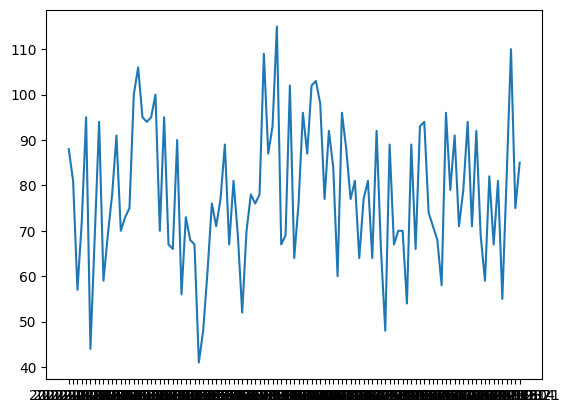

In [19]:
# graph of df1, date vs demand

plt.plot(df1['date'], df1['demand'])
plt.show()


In [10]:
# Here I will simulate to make the 10 year data.

# Ensure the 'date' column is in datetime formats
df1['date'] = pd.to_datetime(df1['date'])

# Get the frequency of data (weekly)
freq = pd.infer_freq(df1['date'])

# Simulate past 8 years of data based on existing data statistics
# We want to simulate data from 2014-10-24 to 2022-10-24
num_weeks_to_simulate = 8 * 52  # Approximate number of weeks

# Generate a list of past dates
start_date = df1['date'].min() - pd.DateOffset(weeks=num_weeks_to_simulate)
new_dates = pd.date_range(start=start_date, end=df1['date'].min() - pd.DateOffset(weeks=1), freq=freq)

# Calculate mean and standard deviation of existing demand data
mean_demand = df1['demand'].mean()
std_demand = df1['demand'].std()

# Simulate demand values using a normal distribution and convert to whole numbers
simulated_demand = np.random.normal(loc=mean_demand, scale=std_demand, size=len(new_dates)).round().astype(int)

# Create new dataframe for simulated data
simulated_data = pd.DataFrame({
    'product': df1['product'].iloc[0],  # Assuming the same product for simplicity
    'store': df1['store'].iloc[0],  # Assuming the same store for simplicity
    'date': new_dates,
    'demand': simulated_demand
})

# Combine the original dataframe with the simulated data
combined_df = pd.concat([simulated_data, df1]).sort_values(by='date').reset_index(drop=True)


/var/folders/bn/hy61x8_j5ng1fg7vpk14wkq00000gn/T/ipykernel_64056/1892625552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date'] = pd.to_datetime(df1['date'])


In [11]:
combined_df.head()

len(combined_df)

# and save it to a csv file.

# combined_df.to_csv('10_year_data.csv', index=False)


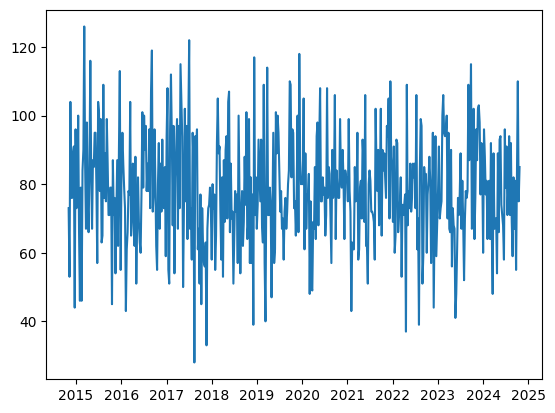

In [20]:
# let me see a graph of the 10_year_data.csv date vs demand

df1 = pd.read_csv('10_year_data.csv')

df1['date'] = pd.to_datetime(df1['date'])

plt.plot(df1['date'], df1['demand'])
plt.show()
